If we picked 100 customers randomly from this tips dataset, what is the probability distribution of the number of customer who tip more than 15 % of their total bill?"

In [1]:
# Importing necessary libraries
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
from scipy.stats import binom  # For binomial probability calculations

In [2]:
# Loading the 'tips' dataset from the specified file path
tips_df = pd.read_csv("C:/Users/dbda.STUDENTSDC/Music/LabPractice/Notebooks/Datasets/tips.csv")  

In [3]:
# Function to classify a tip as success (1) or failure (0) based on tipping percentage
def classify_tip(row):
    total_bill = row['total_bill']  # Extracting total bill amount
    tip = row['tip']  # Extracting tip amount

    # Checking if the tip percentage is greater than 15%
    if (tip / total_bill) > 0.15:
        return 1  # Success: Customer tipped more than 15%
    else:
        return 0  # Failure: Customer tipped 15% or less

In [4]:
# Applying the classify_tip function to each row in the DataFrame to create a binary column
tips_df['tip_binary'] = tips_df.apply(classify_tip, axis=1)

In [5]:
# Calculating the total number of observations (customers in the dataset)
n = len(tips_df)

In [6]:
# Counting the number of successful occurrences (customers who tipped more than 15%)
k = tips_df['tip_binary'].sum()

In [7]:
# Calculating the probability of success (proportion of customers tipping more than 15%)
p = k / n

In [8]:
# Defining the number of trials for the binomial distribution (randomly selecting 100 customers)
trials = 100

In [9]:
# Calculating the binomial probability of exactly 50 successes in 100 trials
hypothetical_k = 50  # Defining the hypothetical number of successes
probability = binom.pmf(hypothetical_k, trials, p)  # Binomial PMF calculation

print("Probability of exactly 50 customers tipping more than 15%:", round(probability, 3))  

Probability of exactly 50 customers tipping more than 15%: 0.045


In [10]:
# Calculating the exact binomial probability for 60% success (60 out of 100 trials)
min_desired_successes = int(0.6 * trials)  # Converts 60% of trials into integer value (60)
exact_probability_60 = binom.pmf(min_desired_successes, trials, p)  # Binomial PMF for 60 successes

# Calculating the exact binomial probability for 65 successes
exact_probability_65 = binom.pmf(65, trials, p)  # Binomial PMF for 65 successes

# Printing the results
print("Probability of exactly 60 customers tipping more than 15%:", round(exact_probability_60, 3))  
print("Probability of exactly 65 customers tipping more than 15%:", round(exact_probability_65, 3))  

Probability of exactly 60 customers tipping more than 15%: 0.052
Probability of exactly 65 customers tipping more than 15%: 0.012


In [11]:
# Calculating the cumulative probability for at most 60 successes (60 out of 100 trials)
cumulative_prob = binom.cdf(min_desired_successes, trials, p)

# Printing the result
print("Cumulative probability of up to 60 customers tipping more than 15%:", round(cumulative_prob, 3))  

Cumulative probability of up to 60 customers tipping more than 15%: 0.851


In [12]:
# Output the results of the binomial probability calculations
print(f"Total trials (n): {n}")  # Total number of customers analyzed
print(f"Number of successes (k): {k}")  # Customers tipping more than 15%
print(f"Probability of success (p): {p:.4f}")  # Estimated probability of tipping > 15%

# Probability of exactly 50 successes in 100 trials
print(f"Binomial probability of exactly {hypothetical_k} successes in {trials} trials: {probability:.4f}")  

# Probability of exactly 60 successes (60% success rate in 100 trials)
print(f"Exact Binomial probability at 60% success (60 out of {trials}): {exact_probability_60:.4f}")  

# Cumulative probability for 60 or fewer successes in 100 trials
# Ensure cumulative_prob is defined before using it!
print(f"Cumulative probability for 60 or fewer successes in {trials} trials: {cumulative_prob:.4f}")  

# Probability of exactly 65 successes (65% success rate in 100 trials)
print(f"Exact Binomial probability at 65% success (65 out of {trials}): {exact_probability_65:.4f}")  

Total trials (n): 244
Number of successes (k): 135
Probability of success (p): 0.5533
Binomial probability of exactly 50 successes in 100 trials: 0.0450
Exact Binomial probability at 60% success (60 out of 100): 0.0520
Cumulative probability for 60 or fewer successes in 100 trials: 0.8510
Exact Binomial probability at 65% success (65 out of 100): 0.0121


In [13]:
# Generating x values representing possible number of successes (from 0 to 100)
x = np.arange(0, trials + 1)

In [14]:
# Calculating the Probability Mass Function (PMF) for each possible number of successes
pmf_values = binom.pmf(x, trials, p)

In [15]:
# Calculating the cumulative distribution function (CDF) for each possible success count (0 to 100)
cdf_values = binom.cdf(x, trials, p)

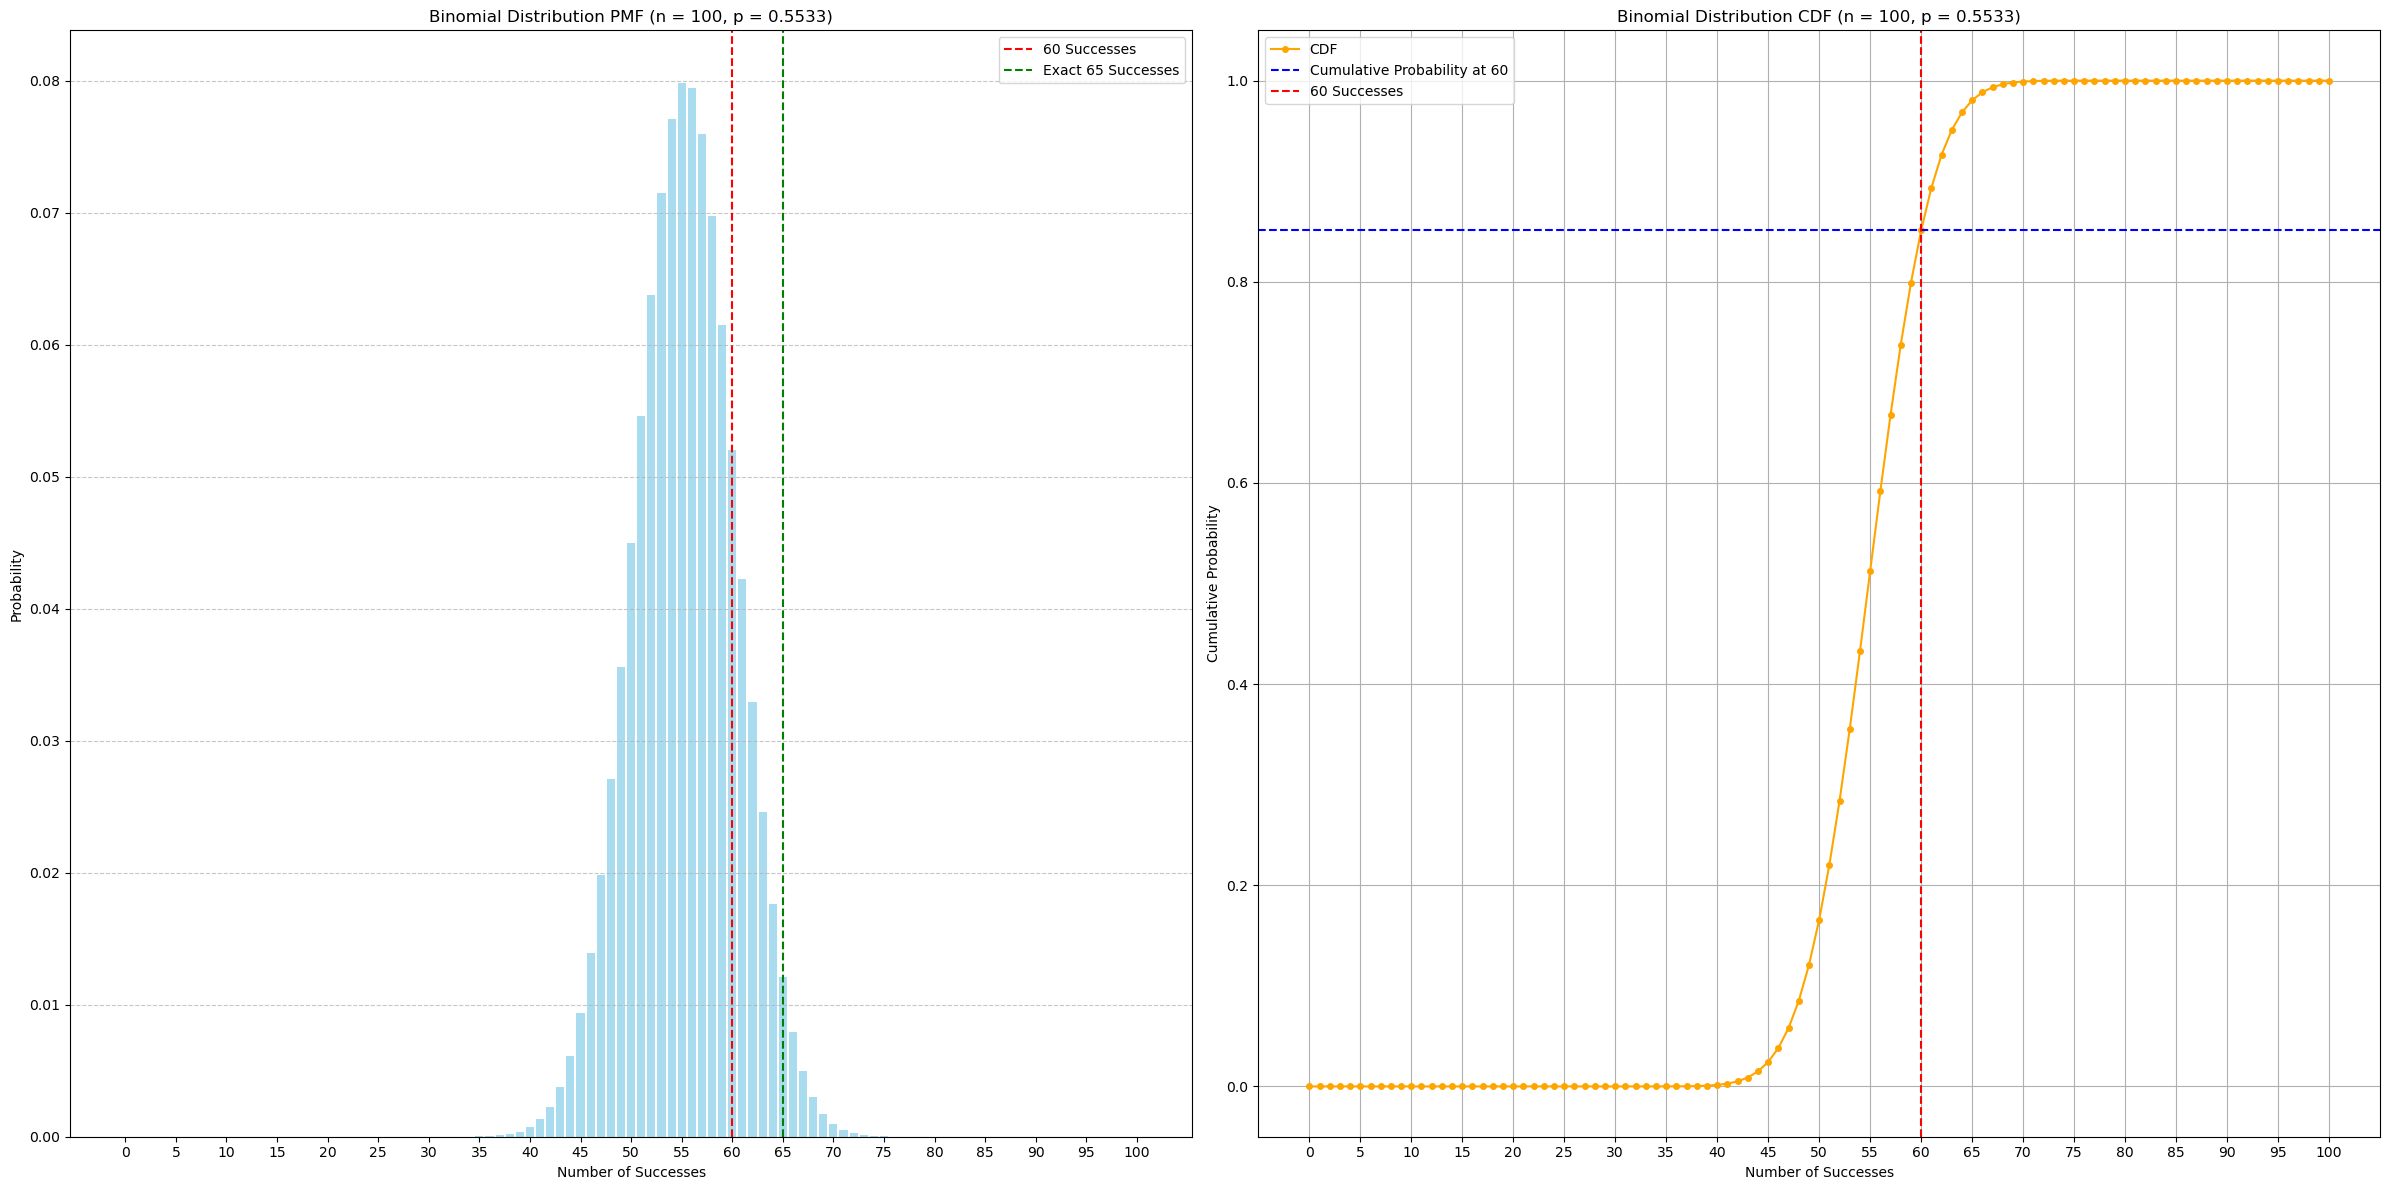

In [16]:
# Creating a figure for plotting the Probability Mass Function (PMF) and Cumulative Distribution Function (CDF)
plt.figure(figsize=(24, 12))  # Setting up a large figure for clear visualization

# Probability Mass Function (PMF) Plot
plt.subplot(1, 2, 1)  # Creating the first subplot (1 row, 2 columns, first plot)
plt.bar(x, pmf_values, color='skyblue', alpha=0.7)  # Bar plot for PMF
plt.title(f'Binomial Distribution PMF (n = {trials}, p = {p:.4f})')  # Title for PMF
plt.xlabel('Number of Successes')  # X-axis label
plt.ylabel('Probability')  # Y-axis label
plt.xticks(np.arange(0, trials + 1, 5))  # Setting X-axis tick marks every 5 units
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding a grid for readability

# Adding reference lines for specific success values
plt.axvline(x=min_desired_successes, color='red', linestyle='--', label='60 Successes')  # Reference line for 60 successes
plt.axvline(x=65, color='green', linestyle='--', label='Exact 65 Successes')  # Reference line for 65 successes
plt.legend()  # Displaying the legend

# Cumulative Distribution Function (CDF) Plot
plt.subplot(1, 2, 2)  # Creating the second subplot (1 row, 2 columns, second plot)
plt.plot(x, cdf_values, marker='o', color='orange', label='CDF', markersize=4)  # Line plot for CDF
plt.title(f'Binomial Distribution CDF (n = {trials}, p = {p:.4f})')  # Title for CDF
plt.xlabel('Number of Successes')  # X-axis label
plt.ylabel('Cumulative Probability')  # Y-axis label
plt.xticks(np.arange(0, trials + 1, 5))  # Setting X-axis tick marks every 5 units
plt.grid()  # Adding grid lines for clarity

# Adding reference lines for specific probabilities
plt.axhline(y=cumulative_prob, color='blue', linestyle='--', label='Cumulative Probability at 60')  # Horizontal reference line
plt.axvline(x=min_desired_successes, color='red', linestyle='--', label='60 Successes')  # Vertical reference line for 60 successes
plt.legend()  # Displaying the legend

plt.tight_layout()  # Adjusting layout for better readability
plt.show()  # Displaying the plots